<a href="https://colab.research.google.com/github/jamaalm01/ARIMA/blob/main/Predicting_BitCoin_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf

In [3]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

<function matplotlib.pyplot.show(close=None, block=None)>

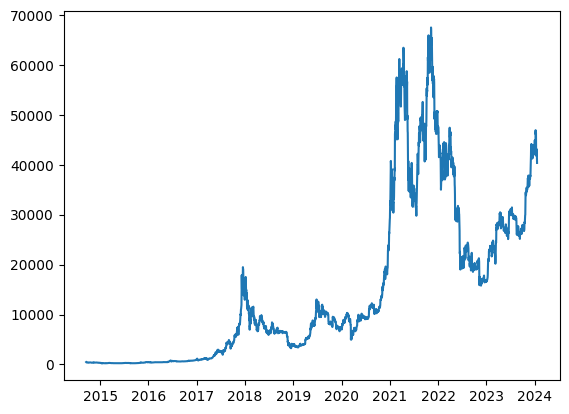

In [5]:
#Plot of BitCoin historical close data
plt.plot(df.index, df['Adj Close'])
plt.show

In [6]:
#Train test split

to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

In [7]:
#Training

model_predictions = []
n_test_obs = len(testing_data)

In [16]:
for i in range(n_test_obs):
  model = ARIMA(training_data,order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)


In [17]:
#Model evaluation
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3411
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -27570.262
Date:                Fri, 19 Jan 2024   AIC                          55150.525
Time:                        17:16:53   BIC                          55181.197
Sample:                             0   HQIC                         55161.486
                               - 3411                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0287      0.009     -3.149      0.002      -0.047      -0.011
ar.L2          0.0094      0.009      1.071      0.284      -0.008       0.027
ar.L3          0.0211      0.009      2.239      0.025       0.003       0.039
ar.L4          0.0276      0.008      3.548      0.000       0.012       0.043
sigma2      6.176e+05   5043.564    122.446      0.000    6.08e+05    6.27e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36797.59
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):             375.36   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

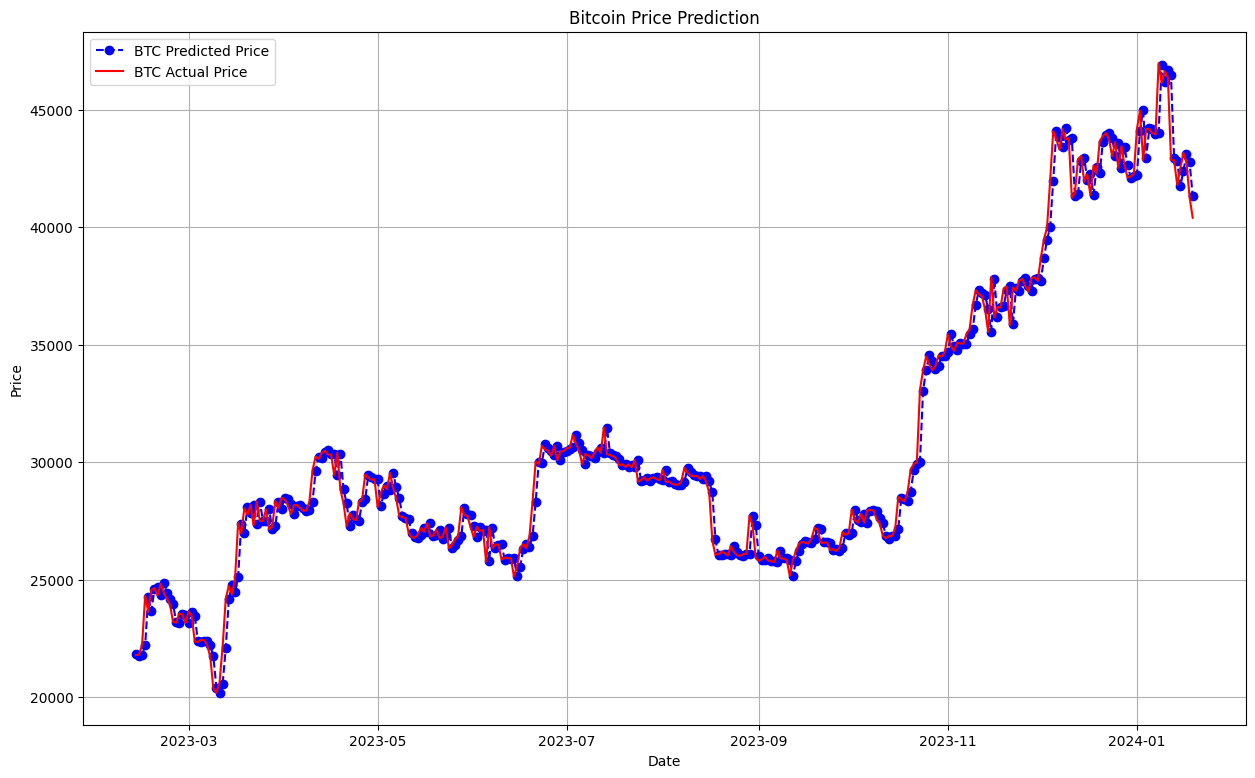

In [20]:
#Plot of predicted closing price vs actual closing price
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC Predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()